<a href="https://colab.research.google.com/github/eshal26/Leukemia-classification/blob/main/ROC_and_PR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip test_dataset.zip

Archive:  test_dataset.zip
   creating: test_dataset/Benign/
  inflating: test_dataset/Benign/WBC-Benign-003.jpg  
  inflating: test_dataset/Benign/WBC-Benign-010.jpg  
  inflating: test_dataset/Benign/WBC-Benign-018.jpg  
  inflating: test_dataset/Benign/WBC-Benign-024.jpg  
  inflating: test_dataset/Benign/WBC-Benign-025.jpg  
  inflating: test_dataset/Benign/WBC-Benign-026.jpg  
  inflating: test_dataset/Benign/WBC-Benign-031.jpg  
  inflating: test_dataset/Benign/WBC-Benign-040.jpg  
  inflating: test_dataset/Benign/WBC-Benign-057.jpg  
  inflating: test_dataset/Benign/WBC-Benign-064.jpg  
  inflating: test_dataset/Benign/WBC-Benign-071.jpg  
  inflating: test_dataset/Benign/WBC-Benign-074.jpg  
  inflating: test_dataset/Benign/WBC-Benign-076.jpg  
  inflating: test_dataset/Benign/WBC-Benign-080.jpg  
  inflating: test_dataset/Benign/WBC-Benign-083.jpg  
  inflating: test_dataset/Benign/WBC-Benign-091.jpg  
  inflating: test_dataset/Benign/WBC-Benign-105.jpg  
  inflating: test_dat

In [2]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Path to your dataset in Google Drive
dataset_path = 'test_dataset'

# Load the dataset
dataset = ImageFolder(root=dataset_path, transform=transform)

# Create a DataLoader
test_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate through the DataLoader
for images, labels in test_loader:
    print(images.size(), labels.size())
    break


torch.Size([32, 3, 299, 299]) torch.Size([32])


In [3]:
import torch
import gdown
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as tv_models

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to download and load the models
def download_and_load_model(file_id, output_name):
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output_name, quiet=False)
    model = torch.load(output_name)
    model.to(device)
    model.eval()  # Set the model to evaluation mode
    return model

# Google Drive file IDs and output names for the models
model_files = [
    ('13lNnIi5LoqCqHHjbwxgz3lMwOyeXMX3Q', 'resnet50.pth'),
    ('1a989oCR3nmtQ-BOFQTXie5Xi-qY2SomD', 'resnet152.pth'),
    ('1VbfraVHTq0cBpj4ngCSp_p8XTzq2HMz0', 'alexnet.pth'),
    ('1-0wHnQer7wChHAaxA_clO6xtNGUGXuvY', 'vgg16.pth'),
    ('1-h9W0-bQjWPrz0-j5CrIopwcPj48r3Bb', 'vgg19.pth'),
    ('1--kBBiBqS97i_liPg4i5GUvoZ306P_A_', 'googlenet.pth'),
    ('1r7vAEPbmRzHXsuOHZpjifC7qRBuqphLt', 'resnet101.pth'),
    ('1F1LeWGzXPF3PB1S7H7K0vX5QtkHZ-ZV6', 'resnet18.pth'),
    ('1l9-0Ca3RrDozN3FMKuoUYfFSOd76V4Pn', 'resnet34.pth')
]

# Load the models
loaded_models = []
model_names = ['ResNet50', 'ResNet152', 'AlexNet', 'VGG16', 'VGG19', 'GoogleNet', 'ResNet101', 'ResNet18', 'ResNet34']

for file_id, output_name in model_files:
    model = download_and_load_model(file_id, output_name)
    loaded_models.append(model)

Downloading...
From (original): https://drive.google.com/uc?id=13lNnIi5LoqCqHHjbwxgz3lMwOyeXMX3Q
From (redirected): https://drive.google.com/uc?id=13lNnIi5LoqCqHHjbwxgz3lMwOyeXMX3Q&confirm=t&uuid=70df6d04-148b-4b73-82af-e26df1aec83d
To: /content/resnet50.pth
100%|██████████| 94.4M/94.4M [00:02<00:00, 36.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a989oCR3nmtQ-BOFQTXie5Xi-qY2SomD
From (redirected): https://drive.google.com/uc?id=1a989oCR3nmtQ-BOFQTXie5Xi-qY2SomD&confirm=t&uuid=6e2ed101-e14e-45d2-98de-e11f0566f898
To: /content/resnet152.pth
100%|██████████| 234M/234M [00:03<00:00, 73.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1VbfraVHTq0cBpj4ngCSp_p8XTzq2HMz0
From (redirected): https://drive.google.com/uc?id=1VbfraVHTq0cBpj4ngCSp_p8XTzq2HMz0&confirm=t&uuid=e28ef552-18df-4823-afdc-ee1c4dafb167
To: /content/alexnet.pth
100%|██████████| 228M/228M [00:05<00:00, 43.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-0wH

In [4]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Define the function to get model outputs
def get_model_outputs(model, test_loader, device):
    y_true, y_scores = [], []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            # For binary classification, use sigmoid activation function
            if outputs.size(1) == 2:
                # If the output size is 2, use softmax to get probabilities
                probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for the positive class
            else:
                # For single output (logit), use sigmoid activation function
                probabilities = torch.sigmoid(outputs).squeeze()  # Convert logits to probabilities

            y_true.extend(labels.cpu().numpy())
            y_scores.extend(probabilities.cpu().numpy())
    return np.array(y_true), np.array(y_scores)

# Get model outputs and calculate metrics
roc_curves = []
pr_curves = []

for model, model_name in zip(loaded_models, model_names):
    y_true, y_scores = get_model_outputs(model, test_loader, device)

    # Ensure y_true is a 1D array
    if y_true.ndim > 1:
        y_true = y_true[:, 0]

    # Compute ROC curves and AUC scores
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = auc(fpr, tpr)

    # Compute PR curves and AUC scores
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auc_pr_score = average_precision_score(y_true, y_scores)

    # Store curves
    roc_curves.append((fpr, tpr, auc_score, model_name))
    pr_curves.append((precision, recall, auc_pr_score, model_name))


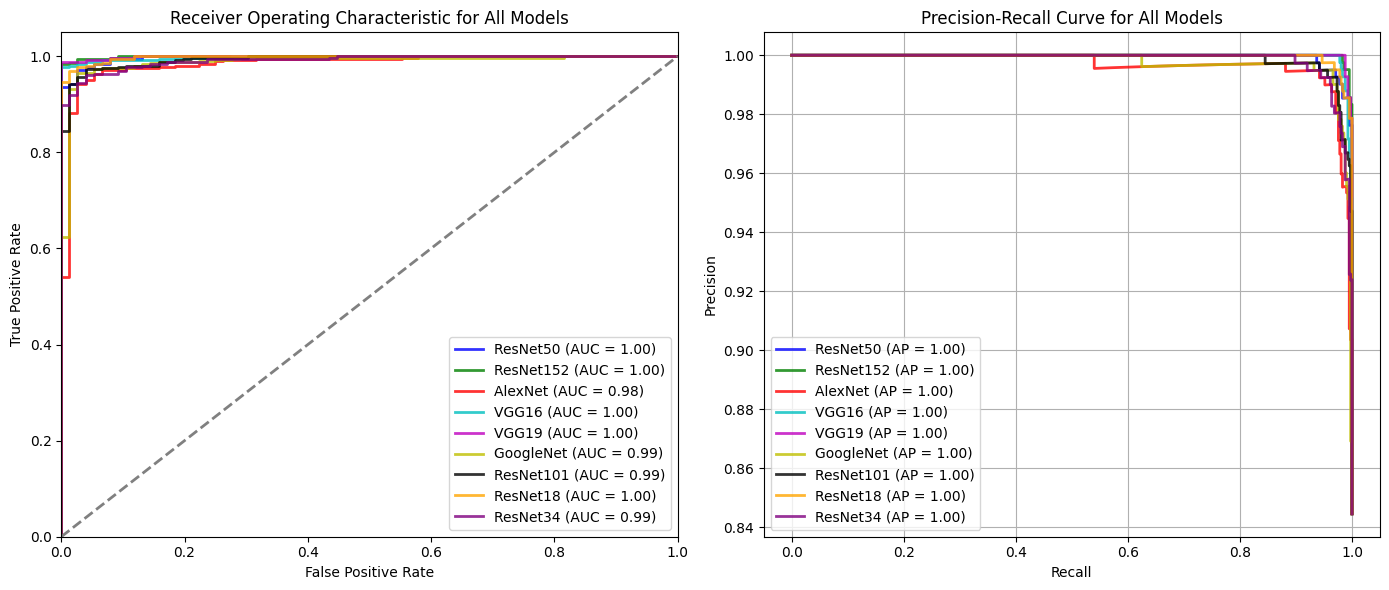

In [6]:
import matplotlib.pyplot as plt

# Improved plotting with distinct colors and thicker lines
def plot_curves(roc_curves, pr_curves):
    plt.figure(figsize=(14, 6))

    # Define colors for each model
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'lime']

    # Plot ROC Curves
    plt.subplot(1, 2, 1)
    for i, (fpr, tpr, auc_score, model_name) in enumerate(roc_curves):
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, alpha=0.8, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for All Models')
    plt.legend(loc='lower right')

    # Plot PR Curves
    plt.subplot(1, 2, 2)
    for i, (precision, recall, auc_pr_score, model_name) in enumerate(pr_curves):
        plt.plot(recall, precision, color=colors[i % len(colors)], lw=2, alpha=0.8, label=f'{model_name} (AP = {auc_pr_score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for All Models')
    plt.legend(loc='lower left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the curves
plot_curves(roc_curves, pr_curves)
